In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_internet = pd.read_excel('PenetraciondelInternetfijoporprovinciaaccesosporcada100hogares_2917941698851677186.xlsx')

c:\Users\Santiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df_internet

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"
...,...,...,...,...
859,2014,1,Santa Cruz,"28,94"
860,2014,1,Santa Fe,"47,85"
861,2014,1,Santiago Del Estero,"16,31"
862,2014,1,Tierra Del Fuego,"63,97"


Se va crear una tabla para saber cuantos archivos hay por trimestre.

In [4]:
conteo_trimestres = df_internet['Trimestre'].value_counts().reset_index()
conteo_trimestres.columns = ['Trimestre', 'Cantidad de archivos']
conteo_trimestres

,Trimestre,Cantidad de archivos
0,4,216
1,3,216
2,2,216
3,1,216


# El KPI propuesto es : 

- Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia . 

La fórmula es la siguiente:
KPI = ((nuevoacceso - accesoactual)/accesoactual) * 100

- "Nuevo acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.
- "Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.

Se separa en un dataframe aparte el ultimo trimestre registrado.

In [6]:
nuevo_df = df_internet[(df_internet['Trimestre'] == 4) & (df_internet['Año'] == 2022)]
nuevo_df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"
5,2022,4,Córdoba,"89,03"
6,2022,4,Corrientes,"51,64"
7,2022,4,Entre Ríos,"64,01"
8,2022,4,Formosa,"39,41"
9,2022,4,Jujuy,"58,46"


In [17]:
# Eliminar las comas y convertir la columna 'Accesos por cada 100 hogares' a números (floats)
nuevo_df['Accesos por cada 100 hogares'] = nuevo_df['Accesos por cada 100 hogares'].astype(float)

# Redondear la columna 'Accesos por cada 100 hogares' hacia arriba o abajo
nuevo_df['Accesos por cada 100 hogares'] = nuevo_df['Accesos por cada 100 hogares'].apply(lambda x: round(x))

# Luego, puedes crear la columna 'Aumento 2%' como se mencionó anteriormente
nuevo_df['Aumento 2%'] = nuevo_df['Accesos por cada 100 hogares'] * 0.02


C:\Users\Santiago\AppData\Local\Temp\ipykernel_15000\2750623857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df['Accesos por cada 100 hogares'] = nuevo_df['Accesos por cada 100 hogares'].astype(float)
C:\Users\Santiago\AppData\Local\Temp\ipykernel_15000\2750623857.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df['Accesos por cada 100 hogares'] = nuevo_df['Accesos por cada 100 hogares'].apply(lambda x: round(x))
C:\Users\Santiago\AppData\Local\Temp\ipykernel_15000\2750623857.py:9: Se

Se puede ver el Aumento del 2% y en la Suma Total se ve las nuevas unidades. 

In [53]:
nuevo_df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Aumento 2%,Suma Total
0,2022,4,Buenos Aires,7894,157.88,8051.88
1,2022,4,Capital Federal,12273,245.46,12518.46
2,2022,4,Catamarca,6577,131.54,6708.54
3,2022,4,Chaco,4362,87.24,4449.24
4,2022,4,Chubut,8557,171.14,8728.14
5,2022,4,Córdoba,8903,178.06,9081.06
6,2022,4,Corrientes,5164,103.28,5267.28
7,2022,4,Entre Ríos,6401,128.02,6529.02
8,2022,4,Formosa,3941,78.82,4019.82
9,2022,4,Jujuy,5846,116.92,5962.92


- Se toma como base 10.000 unidades/hogares para el calculo del 100%, con un aumento del 2% se tendria que incrementar en 157.88 unidades para lograr dicha proyeccion, solo en la provinicia de Buenos Aires.

Se suman el total de Accesos por cada 100 hogares que es de 165671.

In [20]:
# Calcular la suma de la columna 'Accesos por cada 100 hogares'
suma_accesos = nuevo_df['Accesos por cada 100 hogares'].sum()

# La variable 'suma_accesos' ahora contiene la suma de la columna 'Accesos por cada 100 hogares'
print("Suma de la columna 'Accesos por cada 100 hogares':", suma_accesos)

Suma de la columna 'Accesos por cada 100 hogares': 165671


Se suma el total de Aumento 2% que es de 3313.42

In [19]:
# Calcular la suma de la columna 'Accesos por cada 100 hogares'
suma_accesos = nuevo_df['Aumento 2%'].sum()

# La variable 'suma_accesos' ahora contiene la suma de la columna 'Accesos por cada 100 hogares'
print("Suma de la columna 'Aumento 2%':", suma_accesos)

Suma de la columna 'Aumento 2%': 3313.42


In [38]:
# Sumar las columnas 'Accesos por cada 100 hogares' y 'Aumento 2%' y guardar el resultado en una nueva columna
nuevo_df['Suma Total'] = nuevo_df['Accesos por cada 100 hogares'] + nuevo_df['Aumento 2%']

In [39]:
nuevo_df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Aumento 2%,Suma Total
0,2022,4,Buenos Aires,7894,157.88,8051.88
1,2022,4,Capital Federal,12273,245.46,12518.46
2,2022,4,Catamarca,6577,131.54,6708.54
3,2022,4,Chaco,4362,87.24,4449.24
4,2022,4,Chubut,8557,171.14,8728.14
5,2022,4,Córdoba,8903,178.06,9081.06
6,2022,4,Corrientes,5164,103.28,5267.28
7,2022,4,Entre Ríos,6401,128.02,6529.02
8,2022,4,Formosa,3941,78.82,4019.82
9,2022,4,Jujuy,5846,116.92,5962.92


In [41]:
# Calcula la suma total de las columnas que deseas
suma_accesos = nuevo_df['Accesos por cada 100 hogares'].sum()
suma_aumento = nuevo_df['Aumento 2%'].sum()
suma_total = nuevo_df['Suma Total'].sum()


In [51]:
nueva_fila = {'Accesos por cada 100 hogares': suma_accesos, 'Aumento 2%': suma_aumento, 'Suma Total': suma_total}

Una linea nueva con las tres sumas totales. {'Accesos por cada 100 hogares': 165671,
 'Aumento 2%': 3313.42,
 'Suma Total': 168984.41999999998}

In [49]:
nueva_fila

{'Accesos por cada 100 hogares': 165671,
 'Aumento 2%': 3313.42,
 'Suma Total': 168984.41999999998}

In [52]:
((suma_total - suma_accesos)/ suma_accesos) *100

1.9999999999999902

- Según lo establecido en la consigna, al aplicar un aumento del 2% para el próximo trimestre, se proyecta que el acceso a Internet aumentará a un total de 3313.42, lo que representa una mejora en la calidad del servicio

                                                                                                GRAFICO 

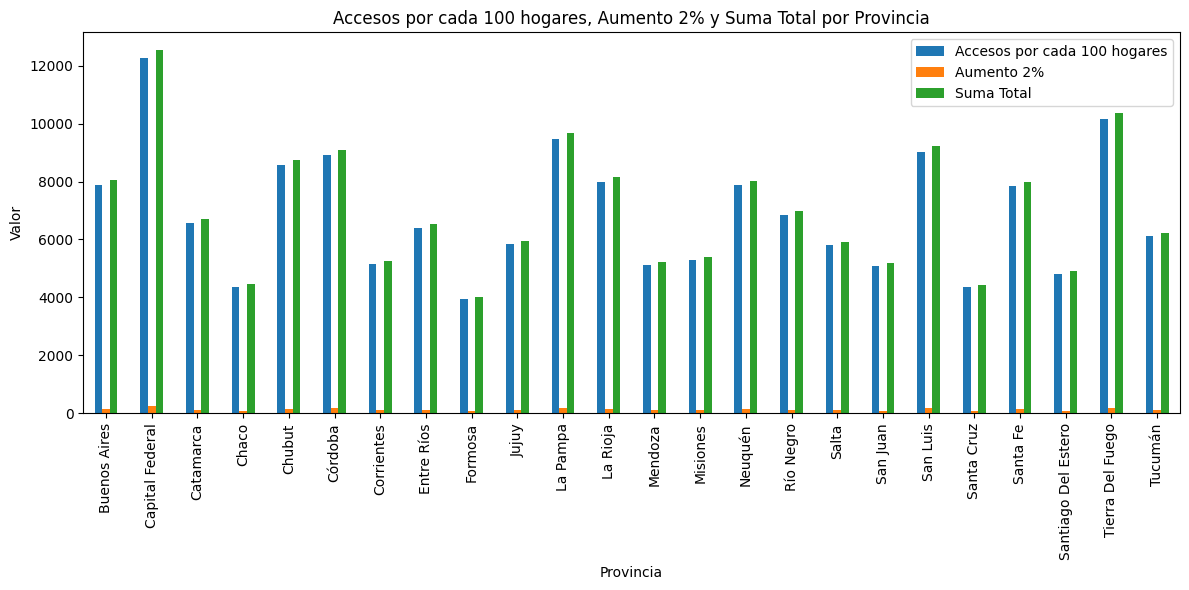

In [54]:
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
nuevo_df.plot(kind='bar', x='Provincia', y=['Accesos por cada 100 hogares', 'Aumento 2%', 'Suma Total'], ax=ax)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Accesos por cada 100 hogares, Aumento 2% y Suma Total por Provincia')
ax.set_xlabel('Provincia')
ax.set_ylabel('Valor')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
#Este código creará un gráfico de barras que muestra la evolución de las tres columnas ('Accesos por cada 100 hogares', 'Aumento 2%', 'Suma Total') en función de las provincias. Puedes ajustar el tamaño y el estilo del gráfico según tus preferencias.


## KPI propuesto por mi :  


- Aumentar un 50% el acceso al servicio de internet para el proximo trimestre, cada 100 hogares, por provincia. La idea es aumentar la mitad de lo que ya habia. 

La fórmula es la siguiente:
KPI = ((nuevamitad - accesoactual)/accesoactual) * 100

- "Nueva mitad" se refiere al número de hogares con acceso a Internet después del próximo trimestre.
- "Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.

Se le suma al datframe anterior el registro del aumento del 50%.

In [55]:
# Supongamos que tienes un DataFrame llamado nuevo_df
# Eliminar las comas y convertir la columna 'Accesos por cada 100 hogares' a números (floats)
nuevo_df['Accesos por cada 100 hogares'] = nuevo_df['Accesos por cada 100 hogares'].astype(float)

# Redondear la columna 'Accesos por cada 100 hogares' hacia arriba o abajo
nuevo_df['Accesos por cada 100 hogares'] = nuevo_df['Accesos por cada 100 hogares'].apply(lambda x: round(x))

# Luego, puedes crear la columna 'Aumento 2%' como se mencionó anteriormente
nuevo_df['Aumento 50%'] = nuevo_df['Accesos por cada 100 hogares'] * 0.5

In [56]:
nuevo_df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Aumento 2%,Suma Total,Aumento 50%
0,2022,4,Buenos Aires,7894,157.88,8051.88,3947.0
1,2022,4,Capital Federal,12273,245.46,12518.46,6136.5
2,2022,4,Catamarca,6577,131.54,6708.54,3288.5
3,2022,4,Chaco,4362,87.24,4449.24,2181.0
4,2022,4,Chubut,8557,171.14,8728.14,4278.5
5,2022,4,Córdoba,8903,178.06,9081.06,4451.5
6,2022,4,Corrientes,5164,103.28,5267.28,2582.0
7,2022,4,Entre Ríos,6401,128.02,6529.02,3200.5
8,2022,4,Formosa,3941,78.82,4019.82,1970.5
9,2022,4,Jujuy,5846,116.92,5962.92,2923.0


Suma del totoal del Aumento del 50% que es de 82835.5

In [57]:
# Calcular la suma de la columna 'Accesos por cada 100 hogares'
suma_accesos = nuevo_df['Aumento 50%'].sum()

# La variable 'suma_accesos' ahora contiene la suma de la columna 'Accesos por cada 100 hogares'
print("Suma de la columna 'Aumento 50%':", suma_accesos)

Suma de la columna 'Aumento 50%': 82835.5


Al dataframe se le arrgera una columna nueva con la Suma Toal del 50% por provincia.

In [58]:
# Sumar las columnas 'Accesos por cada 100 hogares' y 'Aumento 2%' y guardar el resultado en una nueva columna
nuevo_df['Suma Total del 50%'] = nuevo_df['Accesos por cada 100 hogares'] + nuevo_df['Aumento 50%']

In [59]:
nuevo_df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Aumento 2%,Suma Total,Aumento 50%,Suma Total del 50%
0,2022,4,Buenos Aires,7894,157.88,8051.88,3947.0,11841.0
1,2022,4,Capital Federal,12273,245.46,12518.46,6136.5,18409.5
2,2022,4,Catamarca,6577,131.54,6708.54,3288.5,9865.5
3,2022,4,Chaco,4362,87.24,4449.24,2181.0,6543.0
4,2022,4,Chubut,8557,171.14,8728.14,4278.5,12835.5
5,2022,4,Córdoba,8903,178.06,9081.06,4451.5,13354.5
6,2022,4,Corrientes,5164,103.28,5267.28,2582.0,7746.0
7,2022,4,Entre Ríos,6401,128.02,6529.02,3200.5,9601.5
8,2022,4,Formosa,3941,78.82,4019.82,1970.5,5911.5
9,2022,4,Jujuy,5846,116.92,5962.92,2923.0,8769.0


In [70]:
suma_accesos = nuevo_df['Accesos por cada 100 hogares'].sum()
suma_aumento50 = nuevo_df['Aumento 50%'].sum()
suma_total50 = nuevo_df['Suma Total del 50%'].sum()

Nueva linea con las sumas totales {'Accesos por cada 100 hogares': 165671,
 'Aumento 50%': 82835.5,
 'Suma Total del 50%': 248506.5}

In [71]:
nueva_fila = { 'Accesos por cada 100 hogares': suma_accesos,'Aumento 50%': suma_aumento50, 'Suma Total del 50%': suma_total50}
nueva_fila

{'Accesos por cada 100 hogares': 165671,
 'Aumento 50%': 82835.5,
 'Suma Total del 50%': 248506.5}

In [72]:
((suma_total50 - suma_accesos)/ suma_accesos) *100

50.0

- Según la proyección de un aumento del 50% para el próximo trimestre, se espera que el acceso a Internet aumente significativamente, alcanzando un total de 82835.5, lo que representa una mejora notable en la calidad del servicio

                                                                   GRAFICO

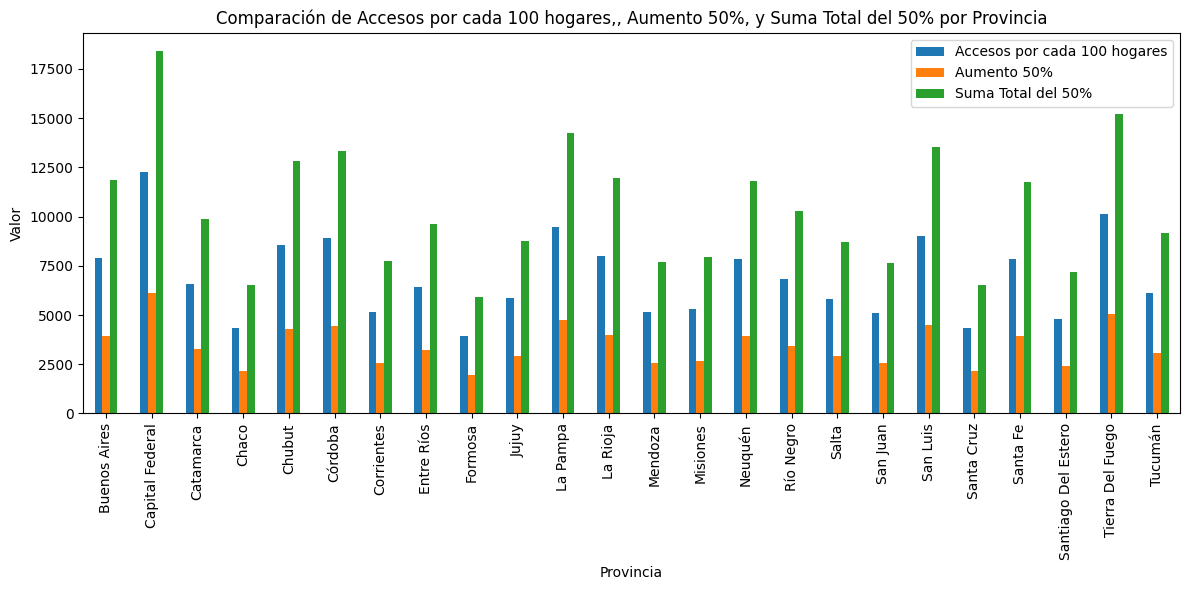

In [74]:
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
nuevo_df.plot(kind='bar', x='Provincia', y=['Accesos por cada 100 hogares', 'Aumento 50%', 'Suma Total del 50%'], ax=ax)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Comparación de Accesos por cada 100 hogares,, Aumento 50%, y Suma Total del 50% por Provincia')
ax.set_xlabel('Provincia')
ax.set_ylabel('Valor')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

--------------

                                                             GRAFICO EN CONJUNTO

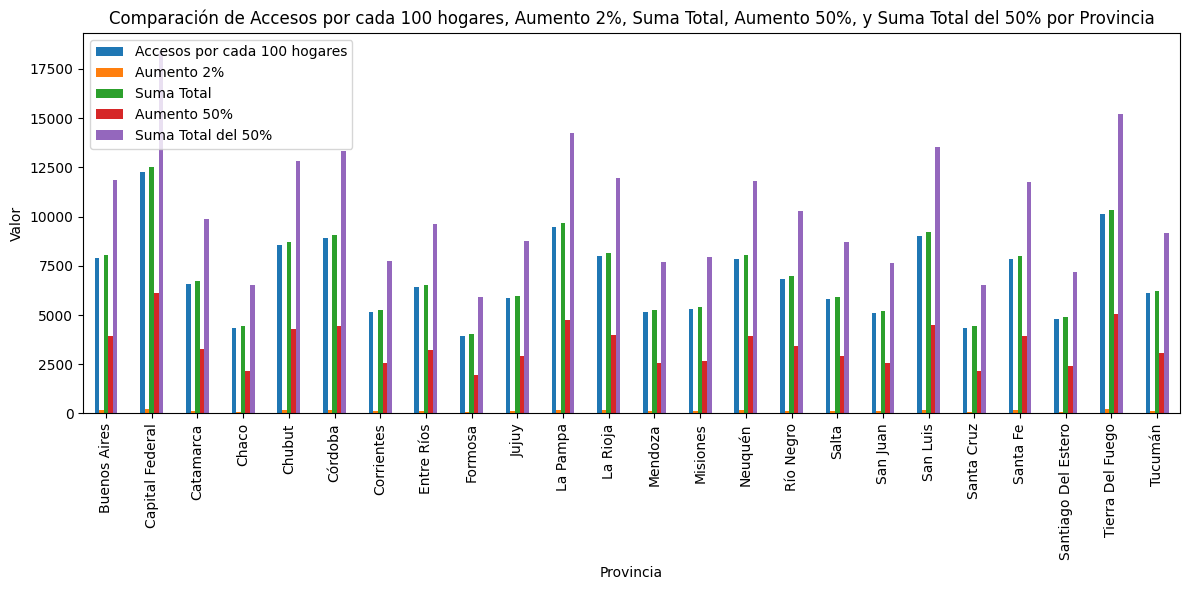

In [73]:
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
nuevo_df.plot(kind='bar', x='Provincia', y=['Accesos por cada 100 hogares', 'Aumento 2%', 'Suma Total', 'Aumento 50%', 'Suma Total del 50%'], ax=ax)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Comparación de Accesos por cada 100 hogares, Aumento 2%, Suma Total, Aumento 50%, y Suma Total del 50% por Provincia')
ax.set_xlabel('Provincia')
ax.set_ylabel('Valor')

# Mostrar el gráfico
plt.tight_layout()
plt.show()